<a href="https://colab.research.google.com/github/Padmashree02/GeoTIFF_Deforestation-detection-Computer-Vision-/blob/main/Main_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#imported required libraries

import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import glob
plt.rcParams['image.cmap'] = 'gray'
from osgeo import gdal

In [2]:
#Acess to the Tiff images using Gdal
ds= gdal.Open('/content/2001api.tif')

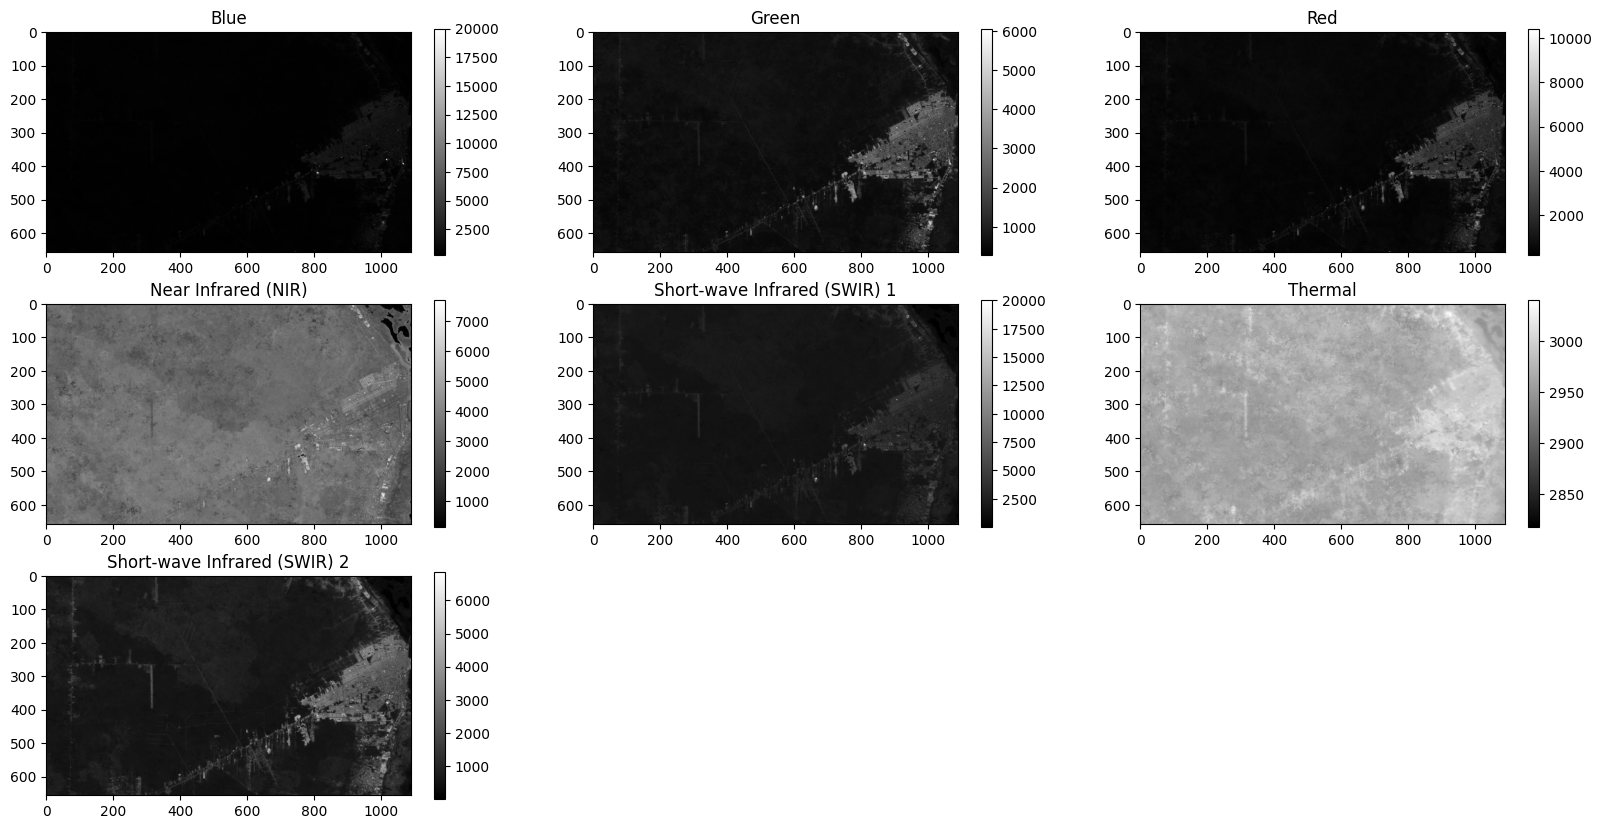

In [10]:
#Pre-processing step
#spliting the image into 7 bands using GetRAsterBand(n) :- n is the channel or band number

#Display of each band
plt.figure(figsize = (20,10))
plt.subplot(331); plt.imshow(ds.GetRasterBand(1).ReadAsArray()); plt.title("Blue"); plt.colorbar();
plt.subplot(332); plt.imshow(ds.GetRasterBand(2).ReadAsArray()); plt.title("Green"); plt.colorbar();
plt.subplot(333); plt.imshow(ds.GetRasterBand(3).ReadAsArray()); plt.title("Red"); plt.colorbar();
plt.subplot(334); plt.imshow(ds.GetRasterBand(4).ReadAsArray()); plt.title("Near Infrared (NIR)"); plt.colorbar();
plt.subplot(335); plt.imshow(ds.GetRasterBand(5).ReadAsArray()); plt.title("Short-wave Infrared (SWIR) 1"); plt.colorbar();
plt.subplot(336); plt.imshow(ds.GetRasterBand(6).ReadAsArray()); plt.title("Thermal"); plt.colorbar();
plt.subplot(337); plt.imshow(ds.GetRasterBand(7).ReadAsArray()); plt.title("Short-wave Infrared (SWIR) 2"),plt.colorbar();

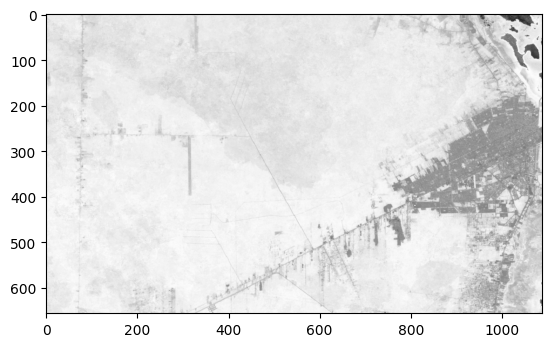

In [11]:
#Computing NDVI between Red and Near-infrared bands

r=ds.GetRasterBand(3).ReadAsArray() #r band extracted
nir=ds.GetRasterBand(4).ReadAsArray() #nir band extracted
ndvi=(nir-r)/(nir+r) #calculate NDVI

#Normalization ndvi from -1 to 1 => 0-255
ndvi=ndvi+1
ndvi=(ndvi/2)*255

#Display the resultant image from NDVI
plt.imshow(ndvi)

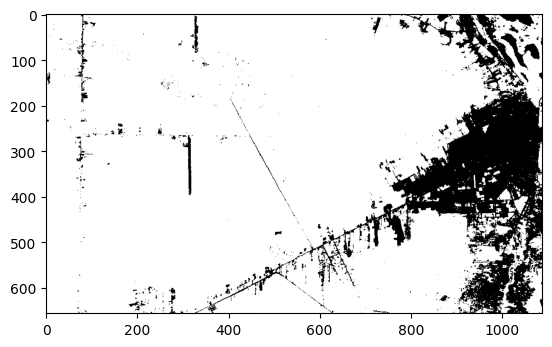

In [12]:
#Mask for image segmentation
reteval,mask=cv2.threshold(ndvi,200,255,cv2.THRESH_BINARY)
plt.imshow(mask)

In [18]:
#Post-processing step

#Calculate the green area from the images of the year 2001
non_pixel=cv2.countNonZero(mask)
tot=mask.shape[0]*mask.shape[1]
vegetation=non_pixel/tot
per=round(vegetation*100,2)
print("Vegetation area in the year of 2001 = ",per,"%")
print("Hence, deforestation area =",round((100-per),2),"%")

Vegetation area in the year of 2001 =  85.69 %
Hence, deforestation area = 14.31 %
